<a href="https://colab.research.google.com/github/Lucas-hearc/KeywordSpotting/blob/main/RCNN_KWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa
!pip install numpy
!pip install matplotlib
!pip install tensorflow

In [2]:
import os
import zipfile
from google.colab import drive
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import tensorflow

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive')
os.chdir('/content/drive/My Drive/DATA')

Mounted at /content/drive


In [3]:
%cd content/

[Errno 2] No such file or directory: 'content/'
/content


In [92]:
x1 = np.load('content/X_split_test.npy')
x2 = np.load('content/X_split_train.npy')
t1=np.shape(x1)
t2=np.shape(x2)

print(np.shape(x1[1]))

(1600,)


In [6]:
%cd  ..

/


In [41]:
%cd content/drive/MyDrive/DATA/data/data/training/

/content/drive/MyDrive


In [40]:
!pip install --user git+https://github.com/python/processing.git


  Cloning https://github.com/python/processing.git to /tmp/pip-req-build-gnh500te
  Running command git clone --filter=blob:none --quiet https://github.com/python/processing.git /tmp/pip-req-build-gnh500te
  fatal: could not read Username for 'https://github.com': No such device or address
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/python/processing.git /tmp/pip-req-build-gnh500te did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/python/processing.git /tmp/pip-req-build-gnh500te did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2157: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


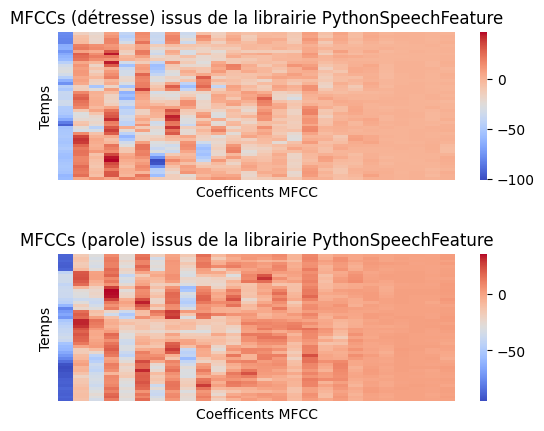

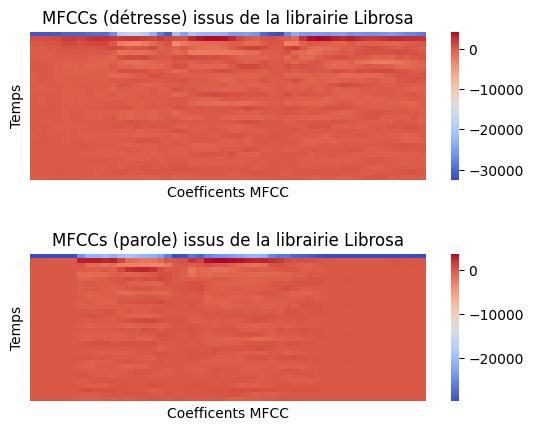

(1, 1300)


In [162]:
import os
import librosa
import numpy as np
import sys
sys.path.append('/content/drive/MyDrive/DATA/data/data/code')
import functions
import feature
import processing
from python_speech_features import mfcc
from python_speech_features import delta


audioFileParole = '/content/drive/MyDrive/DATA/data/data/training/detresse/Detresse.au secour.3rv60cmk.ingestion-5877979785-fpttj.s12.wav'
audioFileDetresse = '/content/drive/MyDrive/DATA/data/data/training/parole/Parole.unknown.40foevmq.ingestion-dffd874c6-lzqhq.s1.wav'

# Paramètres MFCC
nmfcc = 32
frame_length = 0.02
frame_stride = 0.02
filter_number = 256

audioParole, srParole = librosa.load(audioFileParole)
audioDetresse, srDetresse =librosa.load(audioFileDetresse)


mfccPSFParole = mfcc(signal=audioParole, samplerate=srParole, winlen=frame_length, winstep=frame_stride, numcep=nmfcc,appendEnergy=False)
mfccPSFDetresse= mfcc(signal=audioDetresse, samplerate=srDetresse, winlen=frame_length, winstep=frame_stride, numcep=nmfcc,appendEnergy=False)
mfccLIBROSAParole = librosa.feature.mfcc(
    y=audioParole,
    sr=srParole,
    n_mfcc=nmfcc,
    hop_length=int(srParole * frame_stride),
    n_fft=int(srParole * frame_length),
    n_mels=filter_number,
    win_length=int(srParole * frame_length),
    center=False,
    htk=True,
    norm=None)
mfccLIBROSADetresse = librosa.feature.mfcc(
    y=audioDetresse,
    sr=srDetresse,
    n_mfcc=nmfcc,
    hop_length=int(srDetresse * frame_stride),
    n_fft=int(srDetresse * frame_length),
    n_mels=filter_number,
    win_length=int(srDetresse * frame_length),
    center=False,
    htk=True,
    norm=None)
# Tracer la heatmap
plt.figure()
plt.subplot(2,1,1)
seaborn.heatmap(data=mfccPSFDetresse, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.xlabel('Coefficents MFCC')
plt.ylabel('Temps')
plt.title("MFCCs (détresse) issus de la librairie PythonSpeechFeature")
plt.subplot(2,1,2)
seaborn.heatmap(data=mfccPSFParole, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.subplots_adjust(hspace=0.5)
plt.xlabel('Coefficents MFCC')
plt.ylabel('Temps')
plt.title("MFCCs (parole) issus de la librairie PythonSpeechFeature")
plt.show()

# Tracer la heatmap
plt.figure()
plt.subplot(2,1,1)
seaborn.heatmap(data=mfccLIBROSADetresse, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.xlabel('Coefficents MFCC')
plt.ylabel('Temps')
plt.title("MFCCs (détresse) issus de la librairie Librosa")
plt.subplot(2,1,2)
seaborn.heatmap(data=mfccLIBROSAParole, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.subplots_adjust(hspace=0.5)
plt.xlabel('Coefficents MFCC')
plt.ylabel('Temps')
plt.title("MFCCs (parole) issus de la librairie Librosa")
plt.show()





In [59]:
!pip install python_speech_features


  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=ec09dd4b2113c6eb26426f2d7116d16c3bd715e6dd747f814d0cd777df56d444
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


(216, 2)
(1300,)
Epoch 1/100
7/7 - 1s - loss: 280.2038 - accuracy: 0.7407 - val_loss: 38.9818 - val_accuracy: 0.7912 - 1s/epoch - 190ms/step
Epoch 2/100
7/7 - 0s - loss: 54.8435 - accuracy: 0.6806 - val_loss: 7.8808 - val_accuracy: 0.4396 - 267ms/epoch - 38ms/step
Epoch 3/100
7/7 - 0s - loss: 25.8035 - accuracy: 0.5787 - val_loss: 1.6520 - val_accuracy: 0.7802 - 426ms/epoch - 61ms/step
Epoch 4/100
7/7 - 0s - loss: 12.8946 - accuracy: 0.8009 - val_loss: 1.4687 - val_accuracy: 0.7857 - 432ms/epoch - 62ms/step
Epoch 5/100
7/7 - 0s - loss: 9.4531 - accuracy: 0.7778 - val_loss: 0.6951 - val_accuracy: 0.7637 - 488ms/epoch - 70ms/step
Epoch 6/100
7/7 - 0s - loss: 5.9764 - accuracy: 0.6620 - val_loss: 0.5961 - val_accuracy: 0.7418 - 479ms/epoch - 68ms/step
Epoch 7/100
7/7 - 0s - loss: 2.5870 - accuracy: 0.7454 - val_loss: 0.6361 - val_accuracy: 0.7747 - 484ms/epoch - 69ms/step
Epoch 8/100
7/7 - 0s - loss: 3.6067 - accuracy: 0.6250 - val_loss: 0.6609 - val_accuracy: 0.7747 - 448ms/epoch - 64ms/

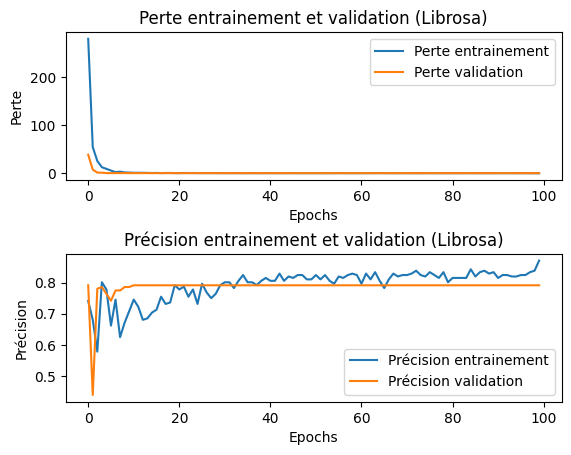

In [171]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2D, MaxPooling2D, Dropout, Flatten
import python_speech_features as psf
import matplotlib.pyplot as plt


# Paramètres MFCC
nmfcc = 26
frame_length = 0.02
frame_stride = 0.02
filter_number = 32
fft_length = 256
normalization_window_size = 101
longueurAudio = 1

# Liste pour stocker les MFCC de tous les fichiers audio
mfccs = []
labels = []

audioFolder = 'content/drive/MyDrive/DATA/data/data/training/detresse/'

# Parcourir tous les fichiers audio du dossier
for filename in os.listdir(audioFolder):
    if filename.endswith('.wav'):
        # Charger le fichier audio
        audio_path = os.path.join(audioFolder, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = psf.mfcc(signal=audio, samplerate=sr, winlen=frame_length, winstep=frame_stride, numcep=nmfcc,appendEnergy=False)
        # Ajouter les MFCC à la liste
        mfcc = np.ravel(mfcc)
        mfccs.append(mfcc)
        labels.append([1,0])


audioFolder = 'content/drive/MyDrive/DATA/data/data/testing/parole/'
for filename in os.listdir(audioFolder):
    if filename.endswith('.wav'):
        # Charger le fichier audio
        audio_path = os.path.join(audioFolder, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = psf.mfcc(signal=audio, samplerate=sr, winlen=frame_length, winstep=frame_stride, numcep=nmfcc,appendEnergy=False)
        # Ajouter les MFCC à la liste
        mfcc = np.ravel(mfcc)
        mfccs.append(mfcc)
        labels.append([0,1])

# Convertir les listes en tableaux numpy 2D
X_train = np.vstack(mfccs)
Y_train = np.array(labels)

print(np.shape(Y_train))

######################################## TESTING ######################################

mfccs_test = []
labels_test = []

audioFolder = 'content/drive/MyDrive/DATA/data/data/testing/parole/'
for filename in os.listdir(audioFolder):
    if filename.endswith('.wav'):
        # Charger le fichier audio
        audio_path = os.path.join(audioFolder, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = psf.mfcc(signal=audio, samplerate=sr, winlen=frame_length, winstep=frame_stride, numcep=nmfcc,appendEnergy=False)
        # Ajouter les MFCC à la liste
        mfcc = np.ravel(mfcc)
        mfccs_test.append(mfcc)
        labels_test.append([0,1])

audioFolder = 'content/drive/MyDrive/DATA/data/data/training/parole/'
for filename in os.listdir(audioFolder):
    if filename.endswith('.wav'):
        # Charger le fichier audio
        audio_path = os.path.join(audioFolder, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = psf.mfcc(signal=audio, samplerate=sr, winlen=frame_length, winstep=frame_stride, numcep=nmfcc,appendEnergy=False)
        # Ajouter les MFCC à la liste
        mfcc = np.ravel(mfcc)
        mfccs_test.append(mfcc)
        labels_test.append([1,0])

# Convertir les listes en tableaux numpy 2D
X_test = np.vstack(mfccs_test)
Y_test = np.array(labels_test)

# Mélanger les données d'entraînement
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
X_train = X_train[indices]
Y_train = Y_train[indices]

indices = np.arange(X_test.shape[0])
np.random.shuffle(indices)
X_test = X_test[indices]
Y_test = Y_test[indices]

input_shape = (int(nmfcc*longueurAudio/frame_length),)

print(input_shape)

model = Sequential()
model.add(Reshape((int(longueurAudio/frame_length), nmfcc, 1), input_shape=input_shape))
model.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

# Définition de l'optimiseur et de la fonction de perte
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
loss = tf.keras.losses.CategoricalCrossentropy()

# Compilation du modèle
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

# Récupérer les métriques d'entraînement et de validation
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Tracer les courbes de perte
plt.figure()
plt.subplot(2,1,1)
plt.plot(train_loss, label='Perte entrainement')
plt.plot(val_loss, label='Perte validation')
plt.xlabel('Epochs')
plt.ylabel('Perte')
plt.title('Perte entrainement et validation (PythonSpeechFeature)')
plt.legend()

# Tracer les courbes d'exactitude

plt.subplot(2,1,2)
plt.plot(train_accuracy, label='Précision entrainement')
plt.plot(val_accuracy, label='Préision validation')
plt.subplots_adjust(hspace=0.5)
plt.xlabel('Epochs')
plt.ylabel('Précision')
plt.title('Précision entrainement et validation (PythonSpeechFeature)')
plt.legend()

# Afficher les graphiques
plt.show()


In [172]:
model.save("/content/drive/MyDrive/DATA/data/data/modelLIBROSA.h5")

In [ ]:
!apt-get install -y portaudio19-dev
!pip install pyaudio

In [83]:
!pip install pydub

In [151]:
import os
import numpy as np
import librosa
from tensorflow.keras.models import load_model
from pydub import AudioSegment
import glob
import python_speech_features as psf

# Chargement du modèle entraîné
model = load_model('/content/drive/MyDrive/DATA/data/data/model.h5')

# Chemin d'accès vers le fichier audio préexistant
audio_filename = '/content/drive/MyDrive/DATA/data/data/audio.wav'

nmfcc = 26
frame_length = 0.02
frame_stride = 0.02
filter_number = 32
fft_length = 256
normalization_window_size = 101

# Fonction pour scinder le fichier audio en segments d'une seconde
def split_audio_segments(audio, duration=1000, overlap=100):
    segments = []
    start = 0
    end = duration
    while end <= len(audio):
        segment = audio[start:end]
        segments.append(segment)
        start += overlap
        end += overlap
    return segments

# Chargement du fichier audio avec pydub
audio = AudioSegment.from_wav(audio_filename)

# Scission du fichier audio en segments d'une seconde à intervalles de 100 ms
segments = split_audio_segments(audio, duration=1000, overlap=100)

# Prédiction pour chaque segment
predictions = []
for i, segment in enumerate(segments):
    # Conversion du segment en tableau numpy et en flottants
    segment_array = np.array(segment.get_array_of_samples(), dtype=np.float32)
    # Normalisation des valeurs entre -1 et 1
    segment_array /= 32768.0
    # Extraction des MFCC
    sr = segment.frame_rate
    audio = segment_array

    mfcc = psf.mfcc(signal=audio, samplerate=sr, winlen=frame_length, winstep=frame_stride, numcep=nmfcc,appendEnergy=False)
    mfcc = mfcc.flatten()
    mfcc = np.expand_dims(mfcc, axis=0)
    print(np.shape(mfcc))
    # Prédiction avec le modèle
    prediction = model.predict(mfcc)
    predictions.append(prediction)

# Sélection des dix segments audio avec les probabilités les plus élevées
top_segments = []
for i, prediction in enumerate(predictions):
    top_segments.append((i, prediction[0, 1]))  # (indice du segment, probabilité de la classe 1)
top_segments.sort(key=lambda x: x[1], reverse=True)  # Tri par probabilité décroissante
top_segments = top_segments[:10]  # Sélection des dix premiers segments

# Création du dossier pour enregistrer les fichiers audio
output_dir = '/content/drive/MyDrive/DATA/data/data/temp'
os.makedirs(output_dir, exist_ok=True)

# Suppression des fichiers déjà présents dans le dossier
existing_files = glob.glob(os.path.join(output_dir, '*.wav'))
for file in existing_files:
    os.remove(file)

# Enregistrement des segments sélectionnés dans le dossier et affichage du nom des fichiers
for segment_idx, prob in top_segments:
    segment = segments[segment_idx]
    output_filename = os.path.join(output_dir, f"segment_{segment_idx}.wav")
    segment.export(output_filename, format='wav')
    print(f"Segment {segment_idx}: Probabilité = {prob:.2f} | Nom du fichier = {output_filename}")

print("Enregistrement des segments audio terminé.")



(1, 1300)
1/1 [==============================] - 0s 96ms/step
(1, 1300)
1/1 [==============================] - 0s 35ms/step
(1, 1300)
1/1 [==============================] - 0s 43ms/step
(1, 1300)
1/1 [==============================] - 0s 42ms/step
(1, 1300)
1/1 [==============================] - 0s 43ms/step
(1, 1300)
1/1 [==============================] - 0s 41ms/step
(1, 1300)
1/1 [==============================] - 0s 35ms/step
(1, 1300)
1/1 [==============================] - 0s 36ms/step
(1, 1300)
1/1 [==============================] - 0s 56ms/step
(1, 1300)
1/1 [==============================] - 0s 33ms/step
(1, 1300)
1/1 [==============================] - 0s 36ms/step
(1, 1300)
1/1 [==============================] - 0s 40ms/step
(1, 1300)
1/1 [==============================] - 0s 48ms/step
(1, 1300)
1/1 [==============================] - 0s 34ms/step
(1, 1300)
1/1 [==============================] - 0s 37ms/step
(1, 1300)
1/1 [==============================] - 0s 38ms/step
(1, 1300

1/1 [==============================] - 0s 24ms/step


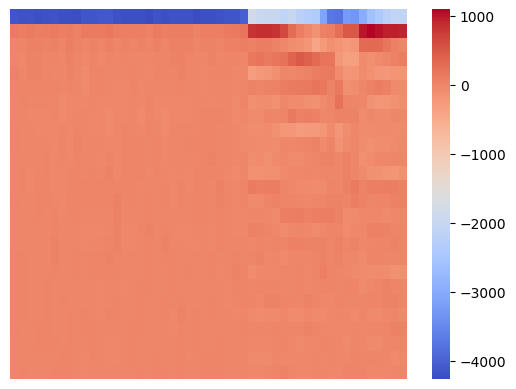

Description : 
     Fichier Detresse
     MFCC issus de LIBROSA
Résultat :
     Reconnu comme :  Détresse
     Précision:  74.64 %


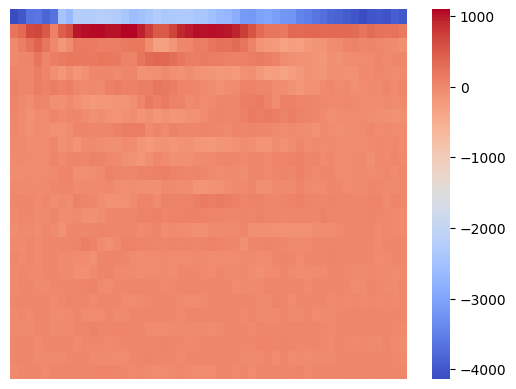

Description : 
     Fichier Parole
     MFCC issus de LIBROSA
Résultat :
     Reconnu comme :  Détresse
     Précision:  74.64 %


In [41]:
import librosa
import numpy as np
import tensorflow
import math
from tensorflow.keras.models import load_model

# Chemin vers le fichier audio à tester
audio_pathDetresse = '/content/drive/MyDrive/DATA/data/data/testing/detresse/Detresse.au secour.3rv60cmk.ingestion-5877979785-fpttj.s45.wav'
audio_pathParole = '/content/drive/MyDrive/DATA/test/mauvais4.wav'

nmfcc = 26
frame_length = 0.02
frame_stride = 0.02
filter_number = 32
fft_length = 256
normalization_window_size = 101

# Charger le fichier audio
audioDetresse, srDetresse = librosa.load(audio_pathDetresse)
audioParole, srParole = librosa.load(audio_pathParole)

model = load_model("/content/drive/MyDrive/DATA/data/data/modelLIBROSA.h5")
# Prétraitement du fichier audio
# Effectuer les mêmes étapes de prétraitement que vous avez utilisées pour l'entraînement
# Prétraitement du fichier audio - Détresse
mfccDetresse = librosa.feature.mfcc(
    y=audioDetresse,
    sr=srDetresse,
    n_mfcc=nmfcc,
    hop_length=int(srDetresse * frame_stride),
    n_fft=int(srDetresse * frame_length),
    n_mels=filter_number,
    win_length=int(srDetresse * frame_length),
    center=False,
    htk=True,
    norm=None)
mfccDetresseRaveled = np.ravel(mfccDetresse)

# Prétraitement du fichier audio - Parole
mfccParole = librosa.feature.mfcc(
    y=audioParole,
    sr=srParole,
    n_mfcc=nmfcc,
    hop_length=int(srParole * frame_stride),
    n_fft=int(srParole * frame_length),
    n_mels=filter_number,
    win_length=int(srParole * frame_length),
    center=False,
    htk=True,
    norm=None)
mfccParoleRaveled = np.ravel(mfccParole)

# Effectuer la prédiction avec votre modèle - Détresse
input_dataDetresse = np.expand_dims(mfccDetresseRaveled, axis=0)
predictionsDetresse = model.predict(input_dataDetresse)

# Effectuer la prédiction avec votre modèle - Parole
input_dataParole = np.expand_dims(mfccParoleRaveled, axis=0)
predictionsParole = model.predict(input_dataParole)

# Interpréter les prédictions
# Par exemple, si vous avez deux classes (0: détresse, 1: parole), vous pouvez utiliser argmax pour obtenir la classe prédite
predicted_class = np.argmax(predictionsDetresse[0])
if predicted_class == 0:
    prediction_label = "Détresse"
else:
    prediction_label = "Parole"


# Afficher les résultats

plt.figure()
seaborn.heatmap(data=mfccDetresse, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()
print("Description : ")
print("     Fichier Detresse")
print("     MFCC issus de LIBROSA")
print("Résultat :")
print("     Reconnu comme : ", prediction_label ,)
print("     Précision: ", round(100 * predictionsDetresse[0][0], 2), "%")

# Interpréter les prédictions
# Par exemple, si vous avez deux classes (0: détresse, 1: parole), vous pouvez utiliser argmax pour obtenir la classe prédite

predicted_class = np.argmax(predictionsParole[0])
if predicted_class == 0:
    prediction_label = "Détresse"
else:
    prediction_label = "Parole"

# Afficher les résultats
plt.figure()
seaborn.heatmap(data=mfccParole, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

print("Description : ")
print("     Fichier Parole")
print("     MFCC issus de LIBROSA")
print("Résultat :")
print("     Reconnu comme : ", prediction_label ,)
print("     Précision: ", round(100 * predictionsParole[0][0], 2), "%")



[-4157.338     -4185.6553    -4167.16      ...   -14.17542      -4.7399783
    20.145988 ]
1/1 [==============================] - 0s 155ms/step


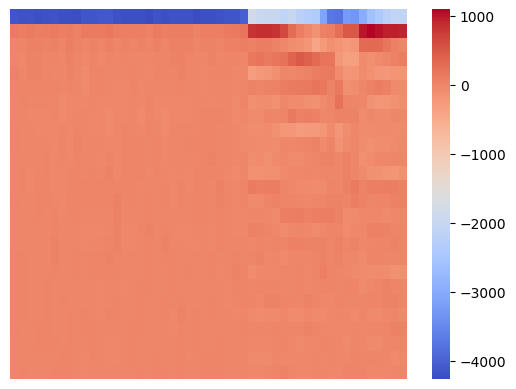

Description : 
     Fichier Parole
     MFCC issus de LIBROSA
Résultat :
     Reconnu comme :  Détresse
     Précision:  74.64 %


In [49]:
import librosa
import numpy as np
import tensorflow
import math
from tensorflow.keras.models import load_model

# Chemin vers le fichier audio à tester
audio_pathParole = '/content/drive/MyDrive/DATA/data/data/testing/detresse/Detresse.au secour.3rv60cmk.ingestion-5877979785-fpttj.s45.wav'

nmfcc = 26
frame_length = 0.02
frame_stride = 0.02
filter_number = 32
fft_length = 256
normalization_window_size = 101

# Charger le fichier audio
audioParole, srParole = librosa.load(audio_pathParole)

model = load_model("/content/drive/MyDrive/DATA/data/data/modelLIBROSA.h5")
# Prétraitement du fichier audio
# Effectuer les mêmes étapes de prétraitement que vous avez utilisées pour l'entraînement

# Prétraitement du fichier audio - Parole
mfccParole = librosa.feature.mfcc(
    y=audioParole,
    sr=srParole,
    n_mfcc=nmfcc,
    hop_length=int(srParole * frame_stride),
    n_fft=int(srParole * frame_length),
    n_mels=filter_number,
    win_length=int(srParole * frame_length),
    center=False,
    htk=True,
    norm=None)
mfccParoleRaveled = np.ravel(mfccParole)
print(mfccParoleRaveled)

# Effectuer la prédiction avec votre modèle - Parole
input_dataParole = np.expand_dims(mfccParoleRaveled, axis=0)
predictionsParole = model.predict(input_dataParole)

# Interpréter les prédictions
# Par exemple, si vous avez deux classes (0: détresse, 1: parole), vous pouvez utiliser argmax pour obtenir la classe prédite

predicted_class = np.argmax(predictionsParole[0])
if predicted_class == 0:
    prediction_label = "Détresse"
else:
    prediction_label = "Parole"

# Afficher les résultats
plt.figure()
seaborn.heatmap(data=mfccParole, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

print("Description : ")
print("     Fichier Parole")
print("     MFCC issus de LIBROSA")
print("Résultat :")
print("     Reconnu comme : ", prediction_label ,)
print("     Précision: ", round(100 * predictionsParole[0][0], 2), "%")


(216, 2)
(1300,)
Epoch 1/100
7/7 - 1s - loss: 162.9282 - accuracy: 0.7130 - val_loss: 73.5017 - val_accuracy: 0.7912 - 1s/epoch - 209ms/step
Epoch 2/100
7/7 - 0s - loss: 96.6921 - accuracy: 0.6667 - val_loss: 8.6871 - val_accuracy: 0.7253 - 452ms/epoch - 65ms/step
Epoch 3/100
7/7 - 0s - loss: 40.0948 - accuracy: 0.7778 - val_loss: 7.8931 - val_accuracy: 0.6154 - 491ms/epoch - 70ms/step
Epoch 4/100
7/7 - 0s - loss: 27.9686 - accuracy: 0.6481 - val_loss: 9.2765 - val_accuracy: 0.3736 - 482ms/epoch - 69ms/step
Epoch 5/100
7/7 - 0s - loss: 10.6389 - accuracy: 0.7593 - val_loss: 1.4454 - val_accuracy: 0.6813 - 483ms/epoch - 69ms/step
Epoch 6/100
7/7 - 0s - loss: 8.1369 - accuracy: 0.7778 - val_loss: 1.3712 - val_accuracy: 0.4231 - 433ms/epoch - 62ms/step
Epoch 7/100
7/7 - 0s - loss: 6.0825 - accuracy: 0.7824 - val_loss: 1.2567 - val_accuracy: 0.3956 - 426ms/epoch - 61ms/step
Epoch 8/100
7/7 - 0s - loss: 4.3683 - accuracy: 0.7222 - val_loss: 1.0181 - val_accuracy: 0.4176 - 431ms/epoch - 62ms

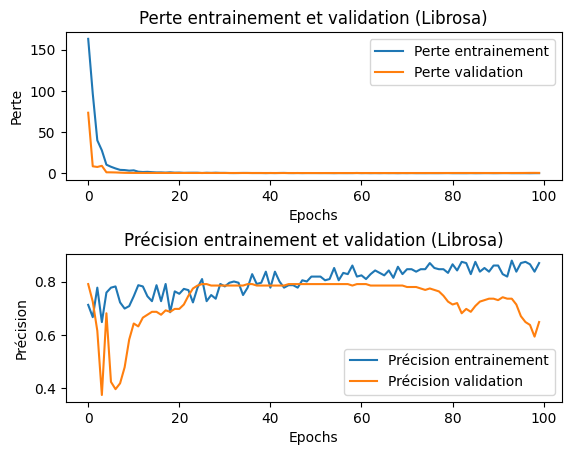

In [82]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2D, MaxPooling2D, Dropout, Flatten
import matplotlib.pyplot as plt


# Paramètres MFCC
nmfcc = 26
frame_length = 0.02
frame_stride = 0.02
filter_number = 32
fft_length = 256
normalization_window_size = 101
longueurAudio = 1

# Liste pour stocker les MFCC de tous les fichiers audio
mfccs = []
labels = []

audioFolder = 'content/drive/MyDrive/DATA/data/data/training/detresse/'

# Parcourir tous les fichiers audio du dossier
for filename in os.listdir(audioFolder):
    if filename.endswith('.wav'):
        # Charger le fichier audio
        audio_path = os.path.join(audioFolder, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=nmfcc, hop_length=int(sr * frame_stride), n_fft=int(sr * frame_length), n_mels=filter_number,  win_length=int(sr * frame_length), center=False, htk=True, norm=None)
        # Ajouter les MFCC à la liste
        mfcc = np.ravel(mfcc)
        mfccs.append(mfcc)
        labels.append([1,0])


audioFolder = 'content/drive/MyDrive/DATA/data/data/testing/parole/'
for filename in os.listdir(audioFolder):
    if filename.endswith('.wav'):
        # Charger le fichier audio
        audio_path = os.path.join(audioFolder, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=nmfcc, hop_length=int(sr * frame_stride), n_fft=int(sr * frame_length), n_mels=filter_number,  win_length=int(sr * frame_length), center=False, htk=True, norm=None)
        # Ajouter les MFCC à la liste
        mfcc = np.ravel(mfcc)
        mfccs.append(mfcc)
        labels.append([0,1])

# Convertir les listes en tableaux numpy 2D
X_train = np.vstack(mfccs)
Y_train = np.array(labels)

print(np.shape(Y_train))

######################################## TESTING ######################################

mfccs_test = []
labels_test = []

audioFolder = 'content/drive/MyDrive/DATA/data/data/testing/parole/'
for filename in os.listdir(audioFolder):
    if filename.endswith('.wav'):
        # Charger le fichier audio
        audio_path = os.path.join(audioFolder, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=nmfcc, hop_length=int(sr * frame_stride), n_fft=int(sr * frame_length), n_mels=filter_number,  win_length=int(sr * frame_length), center=False, htk=True, norm=None)
        # Ajouter les MFCC à la liste
        mfcc = np.ravel(mfcc)
        mfccs_test.append(mfcc)
        labels_test.append([0,1])

audioFolder = 'content/drive/MyDrive/DATA/data/data/training/parole/'
for filename in os.listdir(audioFolder):
    if filename.endswith('.wav'):
        # Charger le fichier audio
        audio_path = os.path.join(audioFolder, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=nmfcc, hop_length=int(sr * frame_stride), n_fft=int(sr * frame_length), n_mels=filter_number,  win_length=int(sr * frame_length), center=False, htk=True, norm=None)
        # Ajouter les MFCC à la liste
        mfcc = np.ravel(mfcc)
        mfccs_test.append(mfcc)
        labels_test.append([1,0])

# Convertir les listes en tableaux numpy 2D
X_test = np.vstack(mfccs_test)
Y_test = np.array(labels_test)

# Mélanger les données d'entraînement
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
X_train = X_train[indices]
Y_train = Y_train[indices]

indices = np.arange(X_test.shape[0])
np.random.shuffle(indices)
X_test = X_test[indices]
Y_test = Y_test[indices]

input_shape = (int(nmfcc*longueurAudio/frame_length),)

print(input_shape)

model = Sequential()
model.add(Reshape((int(longueurAudio/frame_length), nmfcc, 1), input_shape=input_shape))
model.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

# Définition de l'optimiseur et de la fonction de perte
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
loss = tf.keras.losses.CategoricalCrossentropy()

# Compilation du modèle
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

# Récupérer les métriques d'entraînement et de validation
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Tracer les courbes de perte
plt.figure()
plt.subplot(2,1,1)
plt.plot(train_loss, label='Perte entrainement')
plt.plot(val_loss, label='Perte validation')
plt.xlabel('Epochs')
plt.ylabel('Perte')
plt.title('Perte entrainement et validation (Librosa)')
plt.legend()

# Tracer les courbes d'exactitude

plt.subplot(2,1,2)
plt.plot(train_accuracy, label='Précision entrainement')
plt.plot(val_accuracy, label='Précision validation')
plt.subplots_adjust(hspace=0.5)
plt.xlabel('Epochs')
plt.ylabel('Précision')
plt.title('Précision entrainement et validation (Librosa)')
plt.legend()

# Afficher les graphiques
plt.show()

model.save("/content/drive/MyDrive/DATA/data/data/modelPSF.h5")

In [81]:
import librosa
import numpy as np
from tensorflow.keras.models import load_model

# Chemin vers le fichier audio à tester
audio_path = '/content/drive/MyDrive/DATA/data/data/testing/detresse/Detresse.au secour.3rv60cmk.ingestion-5877979785-fpttj.s49.wav'

nmfcc = 26
frame_length = 0.02
frame_stride = 0.02
filter_number = 32

# Charger le modèle pré-entraîné
model = load_model("/content/drive/MyDrive/DATA/data/data/modelLIBROSA.h5")

# Charger le fichier audio
audio, sr = librosa.load(audio_path)

# Prétraitement du fichier audio
mfcc = librosa.feature.mfcc(
    y=audio,
    sr=sr,
    n_mfcc=nmfcc,
    hop_length=int(sr * frame_stride),
    n_fft=int(sr * frame_length),
    n_mels=filter_number,
    win_length=int(sr * frame_length),
    center=False,
    htk=True,
    norm=None)
mfcc = np.ravel(mfcc)

# Effectuer la prédiction avec votre modèle
input_data = np.expand_dims(mfcc, axis=0)
predictions = model.predict(input_data)
print(predictions)
predicted_class = np.argmax(predictions[0])
if predicted_class == 0:
    print("Détresse")
else:
    print("Parole")


1/1 [==============================] - 0s 356ms/step
[[0.00727985 0.9927201 ]]
Parole
